---
title: 贝叶斯网络入门和R代码实践视频教程
date: 2024-01-04 11:27:59
tags: [贝叶斯网络, R语言, bnlearn]
mathjax: true
---


本教程旨在介绍使用贝叶斯网络学习和推理的基础知识，
如何使用R语言（bnlearn）完成一个贝叶斯网络结构建立和参数学习，
以介绍图算法建模的典型数据分析工作流程。 要点包括：

- 数据处理
- 贝叶斯网络原理（结构和参数）
- 将贝叶斯网络用于预测分析
- 将贝叶斯网络用于推理分析


<!-- more -->

### 概率原理

在介绍贝叶斯网络之前， 需要先理解几个概念：

- 先验概率： （Prior Probability）是指根据以往经验和分析得到的概率，通常作为“由因求果”问题中的“因”（自变量、解释变量）出现的概率。通常使用P(A)表示A的先验概率
- 联合概率是指在多元的概率分布中，多个随机变量同时满足各自条件的概率。联合概率表示两个或多个事件共同发生的概率。在概率论中，联合概率可以用符号P(A∩B)表示，也可以用P(AB)表示
- 条件概率是指事件A在另外一个事件B已经发生条件下的发生概率。条件概率表示为P（A|B），读作“在B的条件下A的概率”。如果只有两个事件A和B，那么条件概率的计算公式为：P(A|B) = P(AB) / P(B)。
- 后验概率： 后验概率是指在某个结果发生之后，重新修正该结果的概率。它是贝叶斯定理中的概念，用于根据新的信息更新先验概率。后验概率的计算需要先了解先验概率和似然函数，然后通过贝叶斯公式计算得出。在理解后验概率时，需要注意它与先验概率的关系。先验概率是指在某个结果发生之前，根据经验和数据得到的概率估计。后验概率则是根据新的信息修正先验概率后得到的更接近实际情况的概率估计。
- 全概率： 全概率是指一个事件发生的总概率，可以通过多个互不相交的事件的概率之和来计算。全概率公式通常用于计算条件概率，在这种情况下，我们需要考虑所有可能发生的情况，这些情况通常是互不相交的。通过计算每种情况的概率之和，我们可以得出一个事件发生的总概率


### 贝叶斯网络原理

#### 定义

如果你对数学公式不感兴趣， 你可以跳转到下面的实战部分。

贝叶斯网络（Bayesian network）的定义：

- 网络是由节点和连线构成， 这个网络具体说是一个有向无环图， 无环指的是没有环形的结构， 有向指的是节点之间的连线是有箭头的。
- 节点代表变量， 连线代表变量之间的关系， 箭头往往指向被预测的变量， 在图算法里， 箭头指向的节点是子节点， 箭尾就是父节点， 
- 一个网络可能非常复杂， 但是网络可以分解为每个节点及其父节点这种局部结构

所以， 一个网络的分布就是：

<img src="imgs/eq1.svg" style="background-color:white">

一个典型的有向无环图就是：

<img src="imgs/贝叶斯网络图.png">

根据上面的公式， 我们的这个图暗含的概率是：

<img src="imgs/eq2.svg" style="background-color:white">

因为A节点没有父节点， 那么A发生的概率就是P(A)它是一个先验概率， 而节点E有两个父节点， 那么E的值的分布概率就是一个条件概率P(E|AS).

### 学习

所谓的学习就是从数据中学习网络的结构和参数， 所以学习分为两个阶段， 结构的学习和参数的学习。

节点就是变量， 哪个节点连接哪个节点， 这就是结构， 在贝叶斯网络构建之前， 我们不知道如何构建这个网络， 这用到的方法就是结构学习。
一旦有了网络结构， 下一步就是决定网络的参数是多少， 所谓的参数就是所有节点的联合概率分布。

### 推断

贝叶斯网络的推断就是当你知道网络中某个节点的取值时， 你可以推断其他节点的取值。这其实就是贝叶斯网络的用武之地。
通常我们有两种推断， 一种是条件概率的推断， 一种是极大后验概率的推断。

条件概率的推断（conditional probability）可以参考下图：

<img src="imgs/cp-query.png">

当你知道E节点的取值为uni时， 那么可以推断其他节点的条件概率。

极大后验概率推断可以参考下图：

<img src="imgs/map-query.png">

当你知道某个节点的取值时， 你找到所有节点的取值， 使得这种组合发生的概率最大。



### 工具

我们这个教程主要是教大家如何使用R语言的“bnlearn”完成一个贝叶斯网络， 主要工具就是“bnlearn”。 
bnlearn是一个专门用来学习贝叶斯网络的Python包，包含贝叶斯网络的结构学习、参数学习和推理三个方面的功能。其中，结构学习包含基于约束的算法、基于得分的算法和混合算法，参数学习包括最大似然估计和贝叶斯估计两种方法。此外，bnlearn还提供了自助法（bootstrap）、交叉验证（cross-validation）和随机模拟（stochastic simulation）等功能，附加的绘图功能需要调用前述的Rgraphviz和lattice包。

### bnlearn 入门

#### bnlearn安装

使用R studio 或者任何其他R代码的编辑器, 运行如下命令进行安装:




In [40]:
install.packages("bnlearn")

Warning message:
"package 'bnlearn' is in use and will not be installed"


加载bnlearn到工作空间, 这样你才可以使用bnlearn:

In [41]:
library(bnlearn)

#### 案例数据集

这篇教程基于数据集"transportation_survey", 这个数据集可以在下面下载, 如果找不到可以联系我.

这个数据集非常简单, 每个变量解释如下:

- A 代表 Age, 它有三个水平, young(低于30岁) adult(30-60岁) old(大于60岁)
- S 代表 Sex, 有两种性别, Male 和 Female
- E 代表 education, 有两个水平, high 代表高中及以下, uni 代表大学及以上
- O 代表 Occupation , 有两个分类, emp 就是职工(employee), self 代表自雇(self-employed)
- R 代表 Residence, 城市规模, 分为 大(big) 和 小(small)
- T 代表 Tranvel, 旅行方式, 就是个人偏爱什么交通方式, 有三个分类, Car / Train / other

看到这些变量, 你应该能想到, 这项研究的目的是探讨旅行方式受到哪些因素的影响, 我们经通过今天的教程, 探讨这个问题.

In [42]:
# 读取数据, 保存到survey这个数据框里
survey <- read.csv("transportation_survey.csv", header = TRUE)
head(survey)

,A,S,E,O,R,T
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,adult,F,high,emp,small,train
2,young,M,high,emp,big,car
3,adult,M,uni,emp,big,other
4,old,F,uni,emp,big,car
5,young,F,uni,emp,big,car
6,young,F,uni,emp,big,car


#### 创建一个网络结构

创建一个网络, 使用字符来表示一个网络, 下面这段字符"[A][S][E|A:S][O|E][R|E][T|O:R]"看起来比较复杂, 我们解释一下:

- `[A]`表示一个节点, 它没有父节点, 也就是说没有别的节点指向A节点
- `[S]`也表示一个没有父节点的节点
- `[E|A:S]`表示一个节点E, 同时有两个父节点A和S
- `[O|E]`表示节点O, 同时它的父节点是E
- 其他节点都是类似的表示手法

In [43]:
dag = model2network("[A][S][E|A:S][O|E][R|E][T|O:R]")
dag


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


除了使用字符串的方法构建网络, 还可以使用节点之间的关系, 例如下面的代码,
`arc.set`是一个矩阵, 每一行表示一个关系, 第一列表示父节点, 第二列表示子节点, 下面的代码与上面的代码表示的相同的网络:



In [44]:
arc.set = matrix(c("A", "E",
                   "S", "E",
                   "E", "O",
                   "E", "R",
                   "O", "T",
                   "R", "T"),
            byrow = TRUE, ncol = 2,
            dimnames = list(NULL, c("from", "to")))
dag = empty.graph(c("A", "S", "E", "O", "R", "T"))
arcs(dag) = arc.set
dag


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


#### 网络可视化

我们可以使用 plot 函数可视化一个网络, 但是如下你看到的, 这个图看起来没有规律,
比较乱, 这就是为什么我们不推荐使用 plot. 

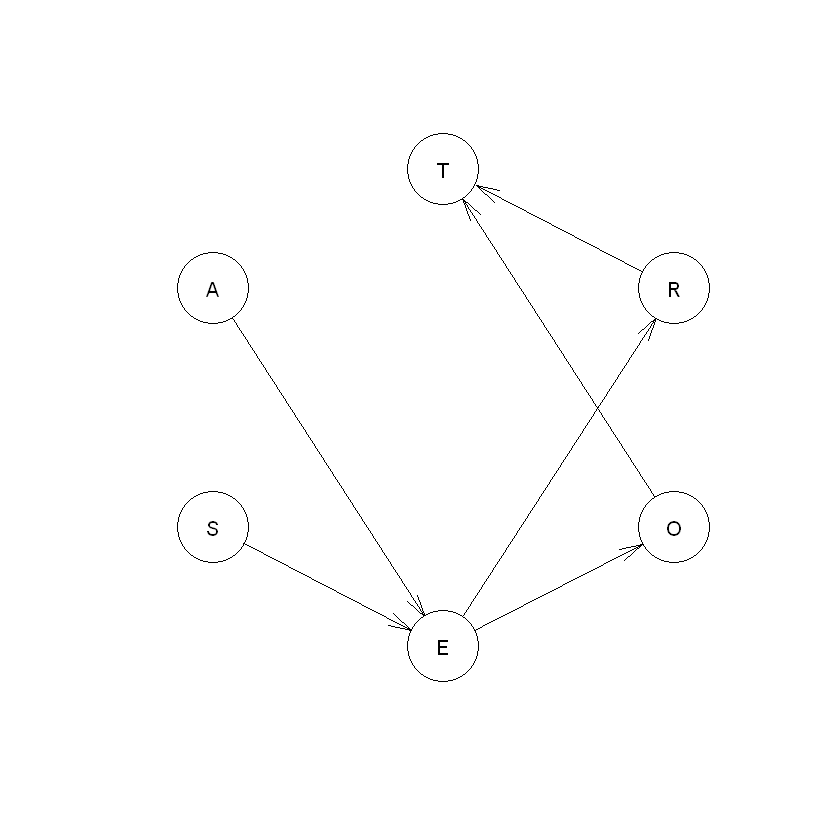

In [45]:
plot(dag)

那么我们还可以使用 graphviz.plot 这个函数, 
这个函数不是来自于bnlearn, 它来自于 Rgraphviz , 所以我们先安装一下.

In [46]:
install.packages("BiocManager")
BiocManager::install("Rgraphviz")

package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syd\AppData\Local\Temp\RtmpK8WHs0\downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Rgraphviz'"
Old packages: 'askpass', 'bookdown', 'brio', 'bslib', 'cli', 'cluster',
  'cowplot', 'cpp11', 'curl', 'data.table', 'datawizard', 'DBI', 'dbplyr',
  'desc', 'dplyr', 'effectsize', 'emmeans', 'evaluate', 'fansi', 'fontawesome',
  'foreign', 'ggplot2', 'ggrepel', 'glue', 'gtable', 'haven', 'htmltools',
  'insight', 'jsonlite', 'KernSmooth', 'knitr', 'labeling', 'lattice',
  'lifecycle', 'lme4', 'lubridate', 'markdown', 'Matrix', 'MatrixModels',
  'mgcv', 'minqa', 'mvtnorm', 'nlme', 'openssl', 'parameters', 'performance',
  'pkgload', 'plyr', 'prettyunits', 'processx', 'progress', 'ps

加载 Rgraphviz:

In [47]:
library("Rgraphviz")

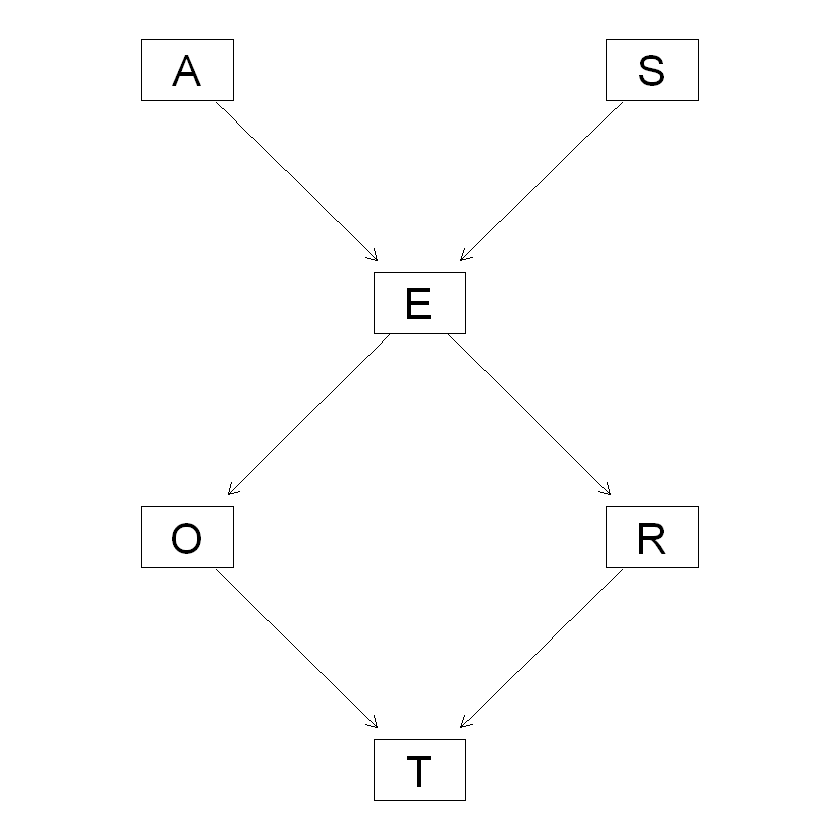

In [48]:
# 可视化

graphviz.plot(dag, layout = "dot")

你现在看到的图是不是已经好多了, 你还可以更改布局:

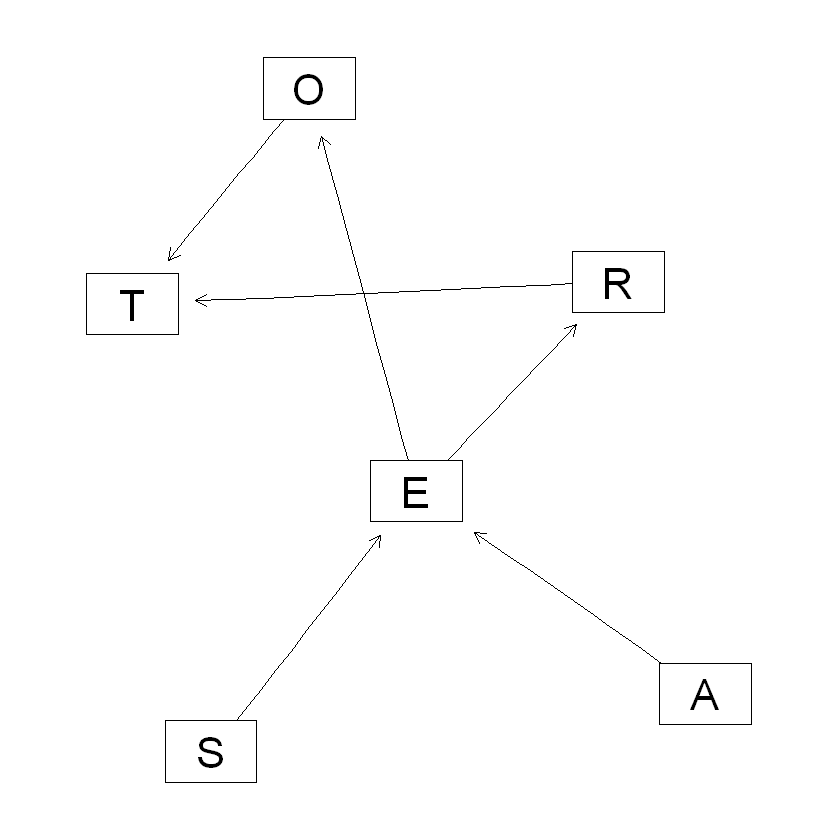

In [49]:
graphviz.plot(dag, layout = "fdp")

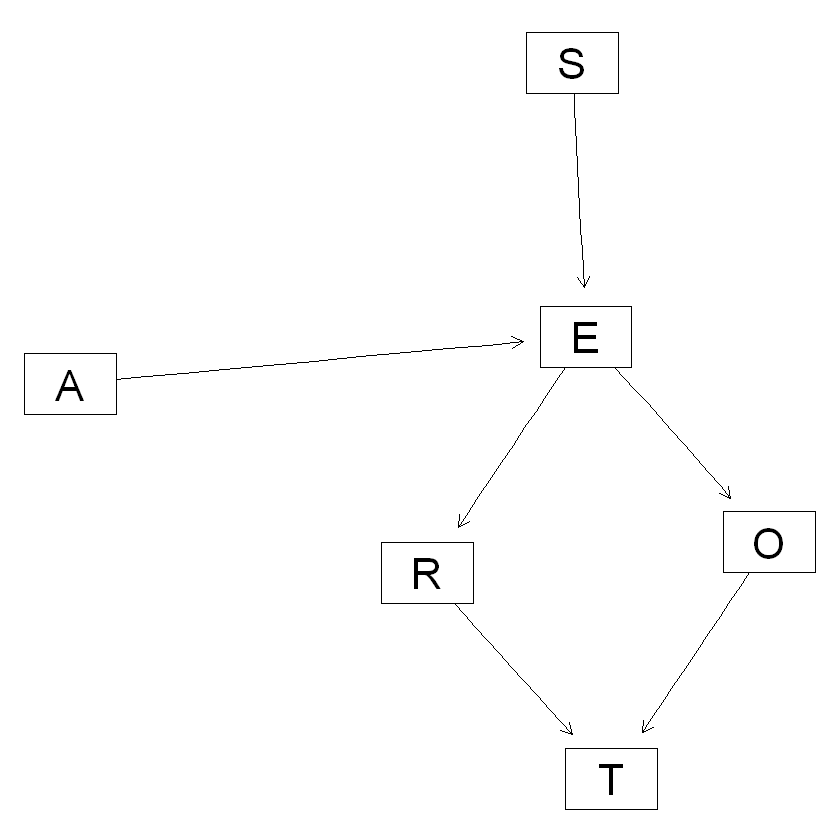

In [50]:
graphviz.plot(dag, layout = "circo")

更改颜色:

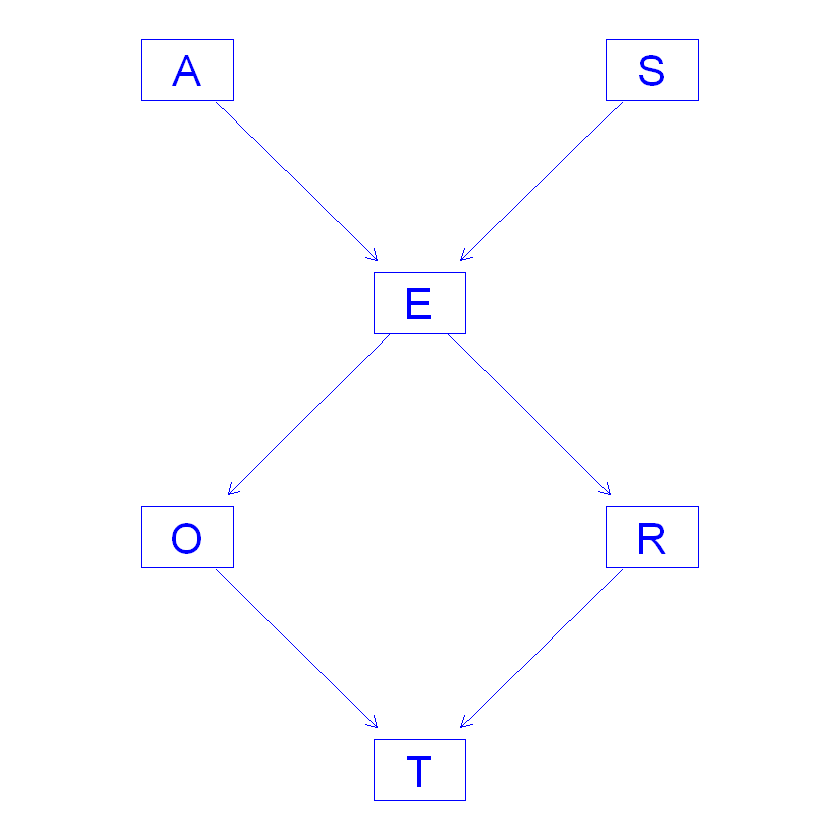

In [51]:
hlight <- list(nodes = nodes(dag), arcs = arcs(dag),
               col = "blue", textCol = "blue")
pp <- graphviz.plot(dag, highlight = hlight)

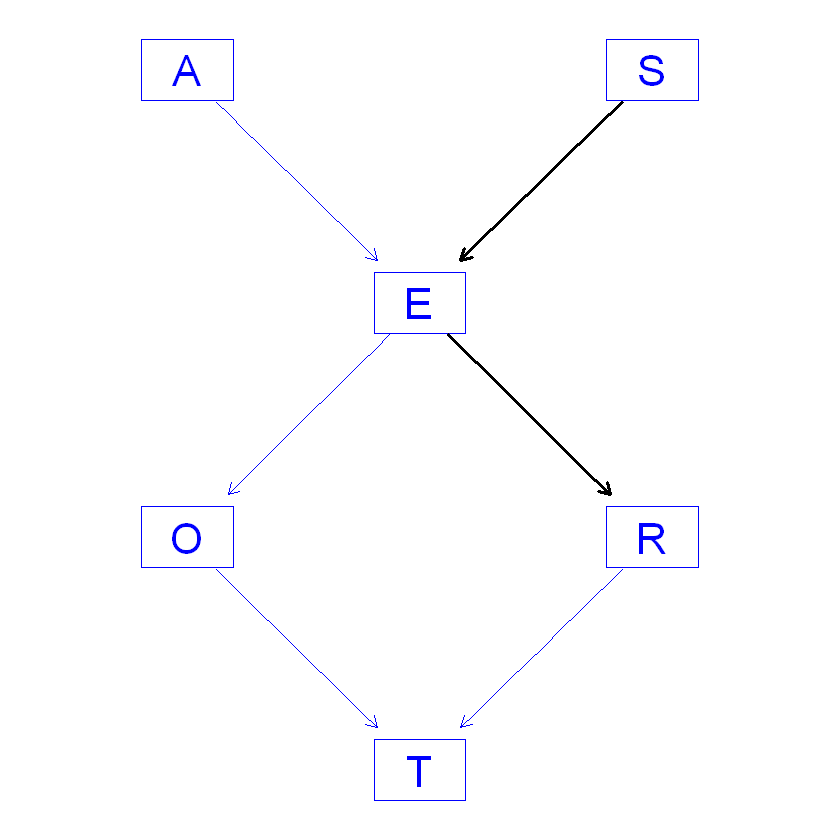

In [52]:
# 箭头颜色也可以更改:

edgeRenderInfo(pp) <- list(col = c("S~E" = "black", "E~R" = "black"),
                           lwd = c("S~E" = 3, "E~R" = 3))
# 需要重新渲染才能看到图

renderGraph(pp)

#### 根据数据求解图结构

图结构是可以由数据学习而来, 研究者可能对最初是的图结构没有预先定义, 
他也不知道使用什么图结构比较好, 那么这时候可是用函数 hc 来求解图结构:

In [71]:
survey$A = as.factor(survey$A)
survey$R = as.factor(survey$R)
survey$E = as.factor(survey$E)
survey$O = as.factor(survey$O)
survey$S = as.factor(survey$S)
survey$T = as.factor(survey$T)

dag = hc(survey)

dag


  Bayesian network learned via Score-based methods

  model:
   [A][S][O][E|A:S][R|E][T|R] 
  nodes:                                 6 
  arcs:                                  4 
    undirected arcs:                     0 
    directed arcs:                       4 
  average markov blanket size:           1.67 
  average neighbourhood size:            1.33 
  average branching factor:              0.67 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              3.107304 
  tests used in the learning procedure:  35 
  optimized:                             TRUE 


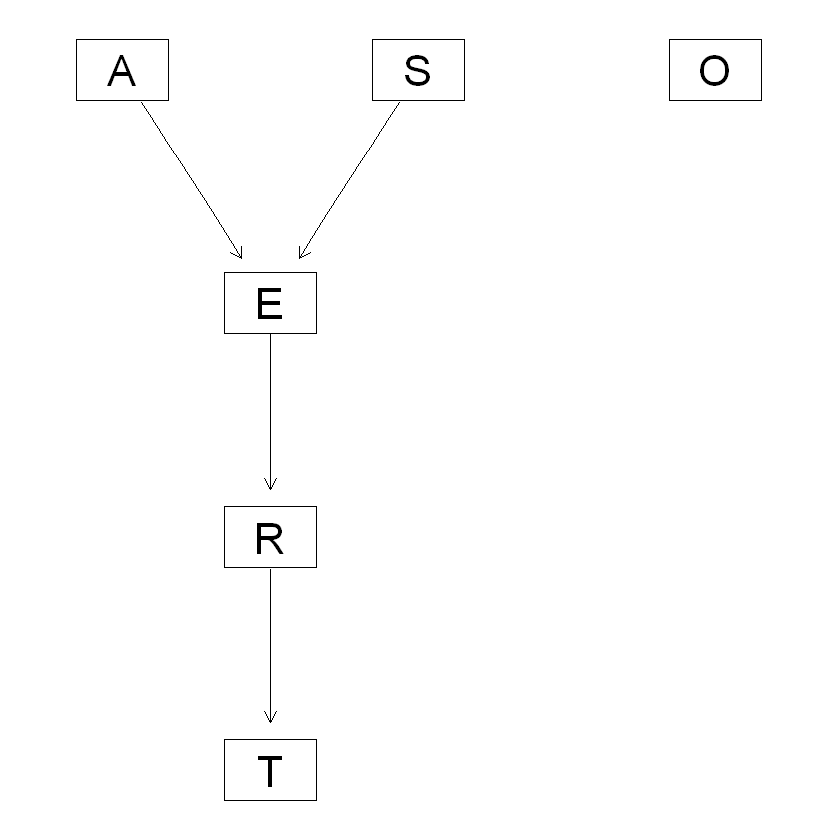

In [72]:
# 可视化

graphviz.plot(dag, layout = "dot")


你可以看到, 这个网络结构与我们预先定义的网络结构有些相似, 但是O节点没啥用, 
也就是这个变量似乎与其他变量没什么关系, 这时候你注意, 
如果研究者认为O变量很重要, 可以重新加入到你的模型中, 
如果O可有可无, 就应该从模型中删除, 
不必完全相信算法给你的结果.

#### 参数学习



在继续讲解bnlearn的函数之前, 需要先理解今天的案例用到的图模型是分类节点构成的模型,
那么模型的参数就是分类变量的条件分布概率, 如果你学过概率论应该知道, 我们可以用表格来表示条件分布概率:

```
##       E
## O      high  uni
##   emp  0.98 0.92
##   self 0.04 0.08
```

上面的概率是如何计算的呢, 请看公式:

$$
\hat{Pr}(O = emp | E = high) = \frac{\hat{Pr}(O = emp, E = high)}{\hat{Pr}(E = high)}= \frac{\text{number of observations for which O = emp and E = high}}{\text{number of observations for which E = high}}
$$

用通俗的语言来说就是, 在 E为high的条件下, O为emp的概率是0.98, 在你的数据中, E为high同时O为emp的样本数除以E为high的样本数就是这个条件概率.
手动计算这个概率就是:

In [55]:
N.E.high = nrow(subset(survey, E=="high"))
N.E.high.O.emp = nrow(subset(survey, E=="high" & O=="emp"))

N.E.high.O.emp / N.E.high



[1] 0.9827586

bnlearn 提供了 函数 bn.fit 帮助我们求所有的条件概率:

In [73]:
fitted = bn.fit(dag, survey)
fitted


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
 adult   old young 
0.388 0.138 0.474 

  Parameters of node S (multinomial distribution)

Conditional probability table:
     F     M 
0.522 0.478 

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , S = F

      A
E          adult       old     young
  high 0.5188679 0.8717949 0.1206897
  uni  0.4811321 0.1282051 0.8793103

, , S = M

      A
E          adult       old     young
  high 0.7613636 0.9000000 0.7685950
  uni  0.2386364 0.1000000 0.2314050


  Parameters of node O (multinomial distribution)

Conditional probability table:
  emp self 
0.98 0.02 

  Parameters of node R (multinomial distribution)

Conditional probability table:
 
       E
R             high        uni
  big   0.75862069 0.93809524
  small 0.24137931 0.06190476

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
       R
T     

这个 fitted 包含了所有条件概率, 从输出中你已经看到.
下面我们可以看下这个模型的预测效果:

In [74]:
# 使用fitted 得到的参数预测survey中的T节点, 可以看下预测效果
pred = predict(fitted, data=survey, node="T")

table(pred, survey$T)

       
pred    car other train
  car   335    65   100
  other   0     0     0
  train   0     0     0

结果是挺差的, 但是这个结果可以看出, 我们的模型把所有样本都预测为car, 因为T是一个分布很不均匀的变量, 
car占的比例过高, 导致模型倾向于预测分布概率较高的分类. 另外导致这个问题的还有模型的结构, 你可以看下模型的结构:

对T有直接影响的就只有R, 也就是说预测T的时候, 只用到了R的取值, 信息损失严重, 所以我们有必要对模型进行修正.

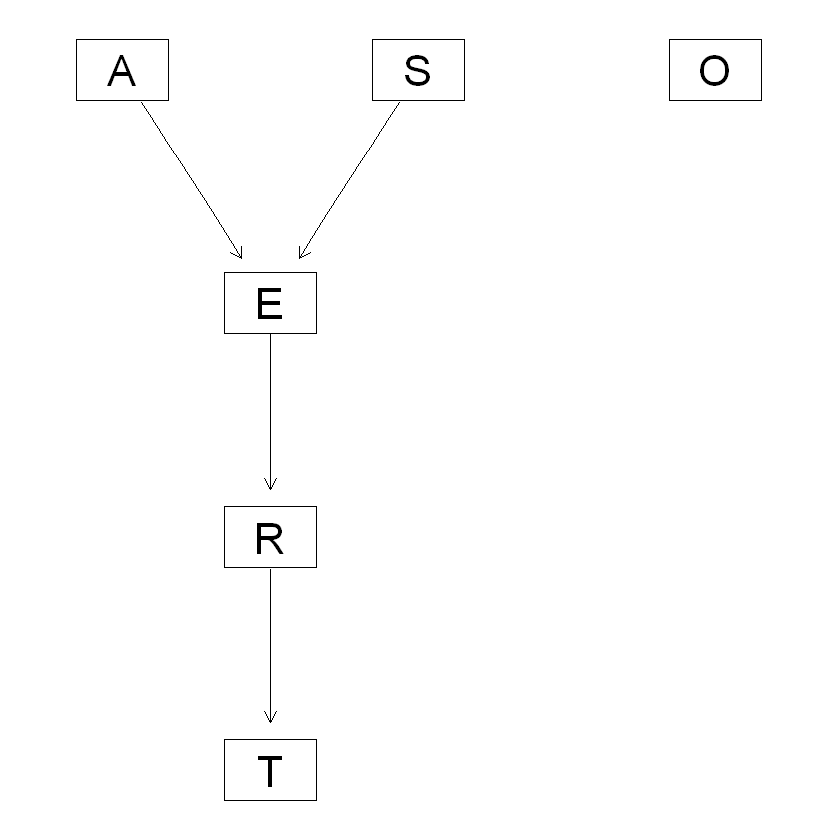

In [75]:
graphviz.plot(dag, layout = "dot")

hc 函数提供了白名单功能, 也就是白名单之中的关系将被保留到模型中, 不受算法的影响, 我们为了保留尽量多的信息, 
将所有节点对T的关系都加入白名单, 看代码:

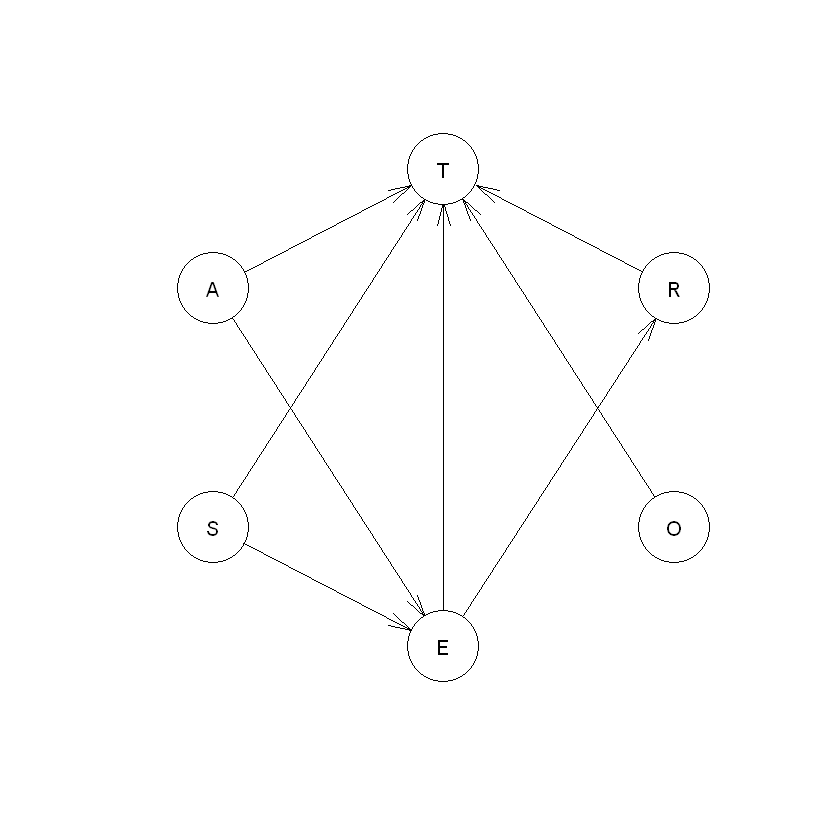

In [79]:
survey <- read.csv("transportation_survey.csv", header = TRUE)
whitelist = data.frame(from=c("A", "E", "O", "S", "R"), to=c("T", "T", "T", "T", "T"))
survey$A = as.factor(survey$A)
survey$R = as.factor(survey$R)
survey$E = as.factor(survey$E)
survey$O = as.factor(survey$O)
survey$S = as.factor(survey$S)
survey$T = as.factor(survey$T)

dag = hc(survey, whitelist=whitelist)
plot(dag)

新的模型结构好多了, 我们看下模型预测的结果, 已经有很多样本被预测为非car意外的类别, 
当然模型还有很大的提升空间, 但是我们先到此位置, 作为一个入门级教程, 不适于再深入.

In [80]:
fitted = bn.fit(dag, data=survey)
pred = predict(fitted, data=survey, node="T")

table(pred, survey$T)

       
pred    car other train
  car   323    60    78
  other   1     3     1
  train  11     2    21

除了从数据中学习模型参数, 
研究者可以自己提供参数, 使用 custom.fit 函数, 这个需要你手动设定所有的条件概率, 例如下面代码


In [90]:
dag2 = model2network("[A][S][E|A:S][O|E][R|E][T|O:R]")
A.lv = c("young", "adult", "old")
S.lv = c("M", "F")
E.lv = c("high", "uni")
O.lv = c("emp", "self")
R.lv = c("big","small")
T.lv = c("car", "other", "train")
A.prob = array(c(0.30, 0.50, 0.20), dim = 3, dimnames = list(A = A.lv))
S.prob = array(c(0.60, 0.40), dim = 2, dimnames = list(S = S.lv))
O.prob = array(c(0.96, 0.04, 0.92, 0.08), dim = c(2, 2),
            dimnames = list(O = O.lv, E = E.lv))
R.prob = array(c(0.25, 0.75, 0.20, 0.80), dim = c(2, 2),
            dimnames = list(R = R.lv, E = E.lv))
E.prob = array(c(0.75, 0.25, 0.72, 0.28, 0.88, 0.12, 0.64,
            0.36, 0.70, 0.30, 0.90, 0.10), dim = c(2, 3, 2),
            dimnames = list(E = E.lv, A = A.lv, S = S.lv))

T.prob = array(c(0.48, 0.42, 0.10, 0.56, 0.36, 0.08, 0.58,
            0.24, 0.18, 0.70, 0.21, 0.09), dim = c(3, 2, 2),
            dimnames = list(T = T.lv, O = O.lv, R = R.lv))
cpt = list(A = A.prob, S = S.prob, E = E.prob, O = O.prob, R = R.prob, T = T.prob)
custom.fitted = custom.fit(dag2, cpt)

custom.fitted


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
 A
young adult   old 
  0.3   0.5   0.2 

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , S = M

      A
E      young adult  old
  high  0.75  0.72 0.88
  uni   0.25  0.28 0.12

, , S = F

      A
E      young adult  old
  high  0.64  0.70 0.90
  uni   0.36  0.30 0.10


  Parameters of node O (multinomial distribution)

Conditional probability table:
 
      E
O      high  uni
  emp  0.96 0.92
  self 0.04 0.08

  Parameters of node R (multinomial distribution)

Conditional probability table:
 
       E
R       high  uni
  big   0.25 0.20
  small 0.75 0.80

  Parameters of node S (multinomial distribution)

Conditional probability table:
 S
  M   F 
0.6 0.4 

  Parameters of node T (multinomial distribution)

Conditional probability table:
 
, , R = big

       O
T        emp self
  car   0.48 0.56
  other 0.42 0.36
  train 0.10 0.08



这个预测的效果也不咋地:

In [91]:

pred = predict(custom.fitted, data=survey, node="T")

table(pred, survey$T)

       
pred    car other train
  car   335    65   100
  other   0     0     0
  train   0     0     0

#### 从模型中采样

当你得到了包含参数的网络模型, 例如上面代码中的 fitted, 你可以做很多事情, 
例如, 你可以从这个网络中生成样本, 使用 rbn 函数生成10个样本:

In [63]:
sample.data = rbn(fitted, n = 100)
head(sample.data)

,A,S,E,O,R,T
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,young,M,high,emp,small,train
2,young,M,high,emp,big,car
3,young,F,high,emp,big,car
4,adult,F,high,emp,small,car
5,adult,F,high,emp,big,other
6,young,F,uni,emp,big,car


#### 预测节点

我们可以对节点(变量)的取值进行预测, 例如, 假设知道了除T以外的所有节点(变量)的取值,
可以对T变量进行预测:

In [94]:
bn.bayes <- bn.fit(dag, data = survey)

pred = predict(bn.bayes, node = "T", data = survey)

pred

[1] car   car   car   other car   car   car   car   car   car   car   car  
 [13] car   train car   car   car   car   car   car   car   car   car   car  
 [25] car   car   car   car   train train car   car   car   car   car   car  
 [37] car   car   train car   car   train car   car   car   car   car   car  
 [49] car   car   car   train car   car   car   car   car   car   car   car  
 [61] car   car   car   car   car   car   car   car   car   car   train car  
 [73] car   car   car   car   car   car   car   car   car   car   car   car  
 [85] car   car   car   train car   car   car   car   car   car   car   car  
 [97] car   car   train car   car   car   car   car   car   car   car   car  
[109] car   car   car   car   car   car   car   car   car   car   car   car  
[121] car   car   car   car   car   car   car   car   car   car   car   car  
[133] train car   car   car   car   car   car   car   car   car   train car  
[145] car   car   car   car   car   car   car   train train car   car   car  
[157] car   car   car   car   car   car   car   car   car   car   car   car  
[169] car   car   car   car   car   car   car   car   car   car   car   car  
[181] car   car   car   car   car   car   car   car   car   car   car   car  
[193] car   car   car   car   car   car   car   car   train car   car   car  
[205] car   train car   car   car   car   car   car   car   car   car   other
[217] car   car   car   train other car   car   car   car   car   car   car  
[229] car   car   car   car   car   car   car   car   car   car   train car  
[241] car   car   car   car   car   car   car   car   car   car   car   car  
[253] train car   car   car   train car   train car   car   car   car   car  
[265] car   car   train car   train car   car   car   car   car   car   car  
[277] car   car   car   car   car   car   train car   car   car   car   car  
[289] car   car   car   train car   train car   car   car   car   car   car  
[301] car   car   car   car   car   car   car   car   car   car   car   car  
[313] car   car   car   car   car   car   car   car   car   car   car   car  
[325] car   car   car   car   car   car   car   train car   car   car   car  
[337] car   car   car   car   car   car   car   car   car   car   car   car  
[349] car   car   car   car   car   car   car   car   car   car   car   car  
[361] car   car   car   train car   car   car   car   car   car   car   car  
[373] car   car   car   car   train car   car   train car   car   car   car  
[385] car   car   car   car   car   car   car   car   car   car   car   car  
[397] car   car   car   car   car   train car   car   car   car   car   car  
[409] car   car   car   car   car   car   car   car   car   car   train car  
[421] car   car   car   car   car   car   car   car   car   car   car   car  
[433] car   car   car   car   car   other car   car   train car   car   car  
[445] car   car   car   train car   car   car   car   car   car   car   car  
[457] car   car   car   car   car   car   car   car   car   car   car   car  
[469] car   car   car   car   car   car   car   other car   car   car   car  
[481] car   car   car   car   car   car   car   car   other car   car   car  
[493] car   car   car   car   car   train train car  
Levels: car other train

或者可以计算某种情况发生的概率, 例如 当节点E取值为high, 想要知道 S == "M" 并且 T == "car" 这种情况的概率:

In [97]:

cpquery(fitted, event = (S == "M") & (T == "car"), evidence = (E == "high"))


[1] 0.451535

### 高级教程


这篇教程就是一个贝叶斯网络的基础入门教程, 
为了让童鞋们在真实研究中使用贝叶斯网络, 
并且可以撰写高质量的分析报告, 
我们还开发了贝叶斯网络的高阶视频教程, 
这篇教程以论文<贝叶斯网络在老年抑郁症危险...HARLS数据库的实证分析>为模板, 
视频演示了论文中用到的所有技术, 并且教你如何整理成论文中用到的数据格式.